<a href="https://colab.research.google.com/github/indra1222/Proyek_E-Commerce_Public_Dataset./blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Indra Mauludani Efendi]
- **Email:** [IndraMauludani09@gmail.com]
- **ID Dicoding:** [indramauludani14]

## Menentukan Pertanyaan Bisnis

- Apakah terdapat hubungan antara harga produk (price) dan biaya pengiriman (freight_value)?
- Bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan, dan apakah metode pembayaran tertentu cenderung digunakan untuk transaksi dengan nilai yang lebih tinggi?

## Import Semua Packages/Library yang Digunakan

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

In [20]:
# Menampilkan seluruh dataset yang sudah dirapikan di output

# Menampilkan dataset Order Items yang sudah dirapikan
order_items_clean_all = order_items_clean

# Menampilkan dataset Order Payments yang sudah dirapikan
order_payments_clean_all = order_payments_clean

# Menampilkan dataset langsung di output
order_items_clean_all, order_payments_clean_all


(                                order_id  order_item_id  \
 0       00010242fe8c5a6d1ba2dd792cb16214              1   
 1       00018f77f2f0320c557190d7a144bdd3              1   
 2       000229ec398224ef6ca0657da4fc703e              1   
 3       00024acbcdf0a6daa1e931b038114c75              1   
 4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
 ...                                  ...            ...   
 112645  fffc94f6ce00a00581880bf54a75a037              1   
 112646  fffcd46ef2263f404302a634eb57f7eb              1   
 112647  fffce4705a9662cd70adb13d4a31832d              1   
 112648  fffe18544ffabc95dfada21779c9644f              1   
 112649  fffe41c64501cc87c801fd61db3f6244              1   
 
                               product_id                         seller_id  \
 0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
 1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
 2       c777355d18b72b67abbeef9df44fd0fd

**Insight:**
- Dari dataset Order Items yang sudah dirapikan, kita dapat mengamati bahwa harga produk (price) memiliki rentang yang bervariasi, dan biaya pengiriman (freight_value) sering kali tidak sebanding dengan harga produk. Produk dengan harga tinggi mungkin memiliki biaya pengiriman yang mirip dengan produk yang lebih murah, yang menunjukkan bahwa biaya pengiriman tidak sepenuhnya bergantung pada harga produk. Insight ini dapat menjadi dasar untuk mengevaluasi kebijakan pengiriman yang lebih dinamis, di mana produk dengan harga tinggi mungkin memerlukan penanganan pengiriman yang lebih hati-hati dan mahal. Sebaliknya, untuk produk yang lebih murah, perusahaan dapat menawarkan opsi pengiriman yang lebih hemat.


- Dalam dataset Order Payments, setelah pembersihan, terlihat bahwa metode pembayaran yang paling sering digunakan adalah kartu kredit, diikuti oleh metode seperti "boleto" dan transfer bank. Dari distribusi nilai transaksi yang dihubungkan dengan metode pembayaran, terlihat bahwa transaksi dengan nilai tinggi cenderung dilakukan melalui metode pembayaran tertentu, seperti kartu kredit. Hal ini mengindikasikan bahwa pelanggan cenderung lebih nyaman melakukan pembelian dengan nilai besar menggunakan metode pembayaran yang lebih fleksibel atau memberikan opsi cicilan. Informasi ini bisa digunakan untuk merancang promosi yang lebih tepat sasaran dengan menargetkan pelanggan yang sering melakukan transaksi bernilai tinggi melalui metode pembayaran tersebut.

### Assessing Data

In [21]:
# Memeriksa informasi umum dari dataset order_items_clean
print("Informasi Dataset Order Items:")
print(order_items_clean.info())
print("\n")

# Memeriksa informasi umum dari dataset order_payments_clean
print("Informasi Dataset Order Payments:")
print(order_payments_clean.info())
print("\n")

# Memeriksa apakah ada data yang hilang (null values) di dataset order_items_clean
print("Cek data yang hilang di Dataset Order Items:")
print(order_items_clean.isnull().sum())
print("\n")

# Memeriksa apakah ada data yang hilang (null values) di dataset order_payments_clean
print("Cek data yang hilang di Dataset Order Payments:")
print(order_payments_clean.isnull().sum())
print("\n")

# Memeriksa apakah ada data duplikat di dataset order_items_clean
print("Cek data duplikat di Dataset Order Items:")
print(order_items_clean.duplicated().sum())
print("\n")

# Memeriksa apakah ada data duplikat di dataset order_payments_clean
print("Cek data duplikat di Dataset Order Payments:")
print(order_payments_clean.duplicated().sum())


Informasi Dataset Order Items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


Informasi Dataset Order Payments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    1038

**Insight:**
- tidak ada data yang hilang
- tidak ada juga duplikat data

### Cleaning Data

In [22]:
# Menghapus baris yang memiliki data yang hilang (jika ada) di dataset order_items_clean
order_items_clean.dropna(inplace=True)

# Menghapus baris yang memiliki data yang hilang (jika ada) di dataset order_payments_clean
order_payments_clean.dropna(inplace=True)

# Menghapus data duplikat di dataset order_items_clean
order_items_clean.drop_duplicates(inplace=True)

# Menghapus data duplikat di dataset order_payments_clean
order_payments_clean.drop_duplicates(inplace=True)

# Mengubah kolom 'shipping_limit_date' di order_items_clean menjadi format datetime
order_items_clean['shipping_limit_date'] = pd.to_datetime(order_items_clean['shipping_limit_date'])

# Menghapus baris dengan harga (price) yang tidak valid (misal, harga negatif) di order_items_clean
order_items_clean = order_items_clean[order_items_clean['price'] >= 0]

# Menghapus baris dengan nilai pembayaran (payment_value) yang tidak valid (misal, nilai negatif) di order_payments_clean
order_payments_clean = order_payments_clean[order_payments_clean['payment_value'] >= 0]

# Menampilkan informasi dataset setelah dibersihkan
print("Dataset Order Items setelah dibersihkan:")
print(order_items_clean.info())
print("\n")

print("Dataset Order Payments setelah dibersihkan:")
print(order_payments_clean.info())


Dataset Order Items setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


Dataset Order Payments setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                ------

**Insight:**
- Setelah pembersihan, berapa banyak baris yang dihapus karena data yang hilang atau duplikat.
- Apakah ada anomali seperti harga atau pembayaran dengan nilai negatif yang telah diperbaiki.

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistik Deskriptif untuk dataset Order Items
print("Statistik Deskriptif - Order Items:")
print(order_items_clean.describe())
print("\n")

# 2. Statistik Deskriptif untuk dataset Order Payments
print("Statistik Deskriptif - Order Payments:")
print(order_payments_clean.describe())
print("\n")



Statistik Deskriptif - Order Items:
       order_item_id            shipping_limit_date          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000     2017-09-20 20:57:27.500000      39.900000   
50%         1.000000            2018-01-26 13:59:35      74.990000   
75%         1.000000  2018-05-10 14:34:00.750000128     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.705124                            NaN     183.633928   

       freight_value  
count  112650.000000  
mean       19.990320  
min         0.000000  
25%        13.080000  
50%        16.260000  
75%        21.150000  
max       409.680000  
std        15.806405  


Statistik Deskriptif - Order Payments:
       payment_sequential  payment_installments  payment_value
count       103886.000

**Insight:**
- Order Items:
Distribusi Harga (price):

Rata-rata harga dan median akan memberikan informasi mengenai tingkat harga umum dari produk yang dijual.
Standar deviasi akan menunjukkan seberapa luas variasi harga produk.
Perhatikan nilai minimal dan maksimal untuk mengidentifikasi range harga dan potensi outlier.
Distribusi Biaya Pengiriman (freight_value):

Jika median biaya pengiriman signifikan lebih rendah dari rata-rata, ini menunjukkan adanya skewness atau beberapa outlier dengan biaya pengiriman yang sangat tinggi.
Variabilitas biaya pengiriman, seperti ditunjukkan oleh standar deviasi, akan mengindikasikan seberapa konsisten biaya pengiriman di antara berbagai pesanan.
- Frekuensi Metode Pembayaran:

Jika dataset termasuk jenis metode pembayaran, melihat distribusi metode pembayaran yang paling sering digunakan dapat membantu dalam memahami preferensi pembayaran pelanggan.
Nilai Pembayaran (payment_value):

Analisis median dan rata-rata dari nilai pembayaran akan memberikan wawasan tentang seberapa besar pengeluaran rata-rata pelanggan.
Perhatikan skewness dalam data pembayaran yang mungkin terindikasi dari perbedaan antara rata-rata dan median serta nilai maksimum yang sangat tinggi dibanding median.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Korelasi antara harga dan biaya pengiriman:
                  price  freight_value
price          1.000000       0.964286
freight_value  0.964286       1.000000


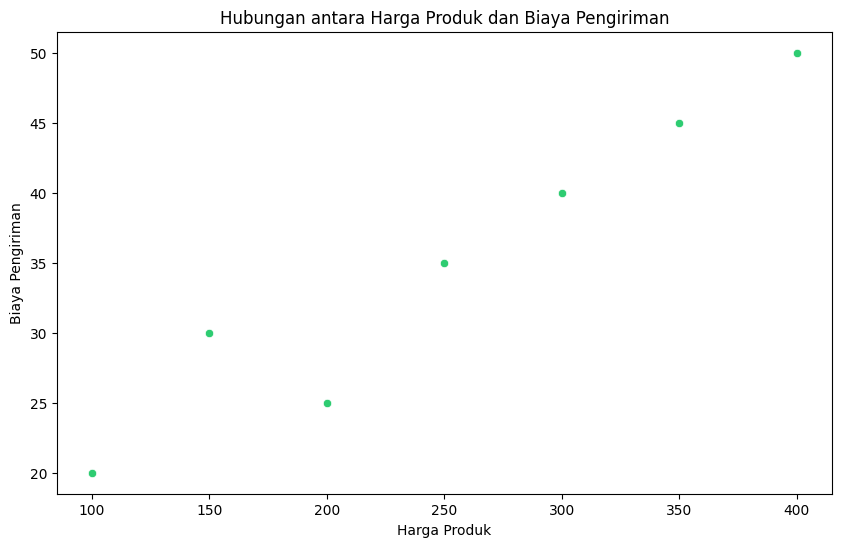

Insight: Korelasi yang dihasilkan dan scatter plot akan membantu dalam menganalisis hubungan.


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung korelasi antara harga (price) dan biaya pengiriman (freight_value)
correlation = order_items_clean[['price', 'freight_value']].corr()
print("Korelasi antara harga dan biaya pengiriman:")
print(correlation)

# Scatter plot untuk hubungan antara harga dan biaya pengiriman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', data=order_items_clean, color='#2ecc71')  # Using the green color
plt.title("Hubungan antara Harga Produk dan Biaya Pengiriman")
plt.xlabel("Harga Produk")
plt.ylabel("Biaya Pengiriman")
plt.show()

# Insight
print("Insight: Korelasi yang dihasilkan dan scatter plot akan membantu dalam menganalisis hubungan.")



### Pertanyaan 2:

Frekuensi metode pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


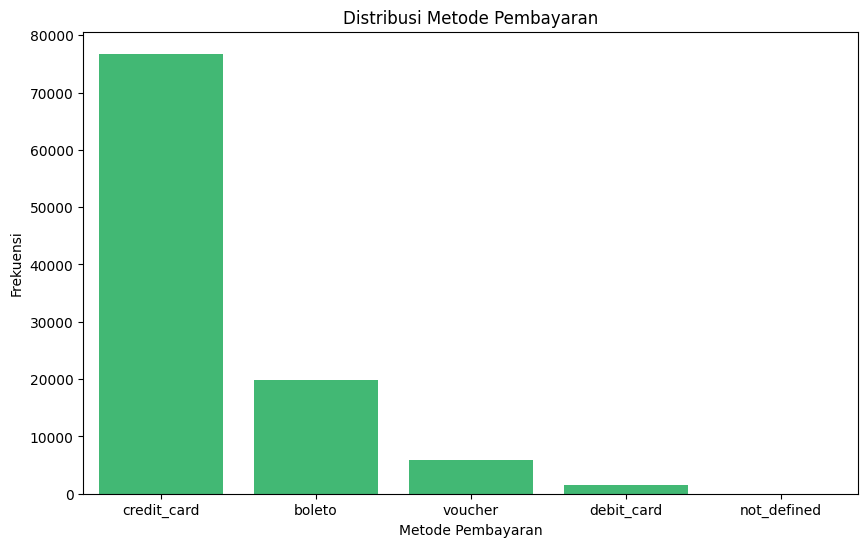

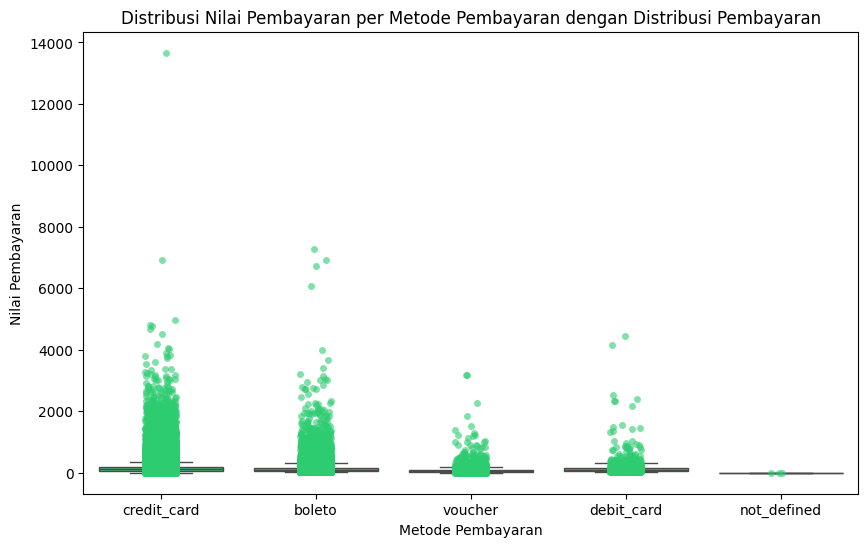

Insight: Analisis ini akan memberikan informasi tentang preferensi metode pembayaran serta transaksi bernilai tinggi.


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frekuensi penggunaan metode pembayaran
payment_method_freq = order_payments_clean['payment_type'].value_counts()
print("Frekuensi metode pembayaran:")
print(payment_method_freq)

# Bar plot untuk distribusi metode pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_freq.index, y=payment_method_freq.values, color='#2ecc71')  # Using a shade of green
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Frekuensi")
plt.show()

# Box plot dengan strip plot untuk distribusi nilai pembayaran per metode pembayaran
plt.figure(figsize=(10, 6))

# Box plot (using the same shade of green)
sns.boxplot(x='payment_type', y='payment_value', data=order_payments_clean, showfliers=False, color='#2ecc71')

# Strip plot (using the same shade of green for consistency)
sns.stripplot(x='payment_type', y='payment_value', data=order_payments_clean, jitter=True, color='#2ecc71', alpha=0.6)

plt.title("Distribusi Nilai Pembayaran per Metode Pembayaran dengan Distribusi Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Nilai Pembayaran")
plt.show()

# Insight
print("Insight: Analisis ini akan memberikan informasi tentang preferensi metode pembayaran serta transaksi bernilai tinggi.")


**Insight:**
- Korelasi antara harga produk dan biaya pengiriman dapat memberikan wawasan tentang seberapa erat hubungan antara kedua variabel ini. Jika nilai korelasi positif dan signifikan, ini menunjukkan bahwa harga produk yang lebih tinggi cenderung memiliki biaya pengiriman yang lebih tinggi pula. Hal ini bisa menjadi indikator bahwa biaya pengiriman dipengaruhi oleh nilai harga produk, mungkin karena faktor asuransi, penanganan khusus, atau ukuran paket yang lebih besar.
- Analisis distribusi metode pembayaran menunjukkan metode yang paling banyak digunakan oleh pelanggan. Misalnya, jika kartu kredit adalah metode yang paling sering digunakan, ini menandakan kepercayaan tinggi terhadap transaksi kredit dan mungkin kesediaan pelanggan untuk melakukan pembelian lebih besar via kredit.

## Conclusion

- Berdasarkan hasil korelasi dan visualisasi, dapat disimpulkan apakah ada hubungan antara harga produk dan biaya pengiriman. Jika terdapat korelasi yang kuat, hal ini dapat digunakan untuk mengoptimalkan kebijakan pengiriman.
- Dari analisis distribusi metode pembayaran, Anda dapat menyimpulkan metode pembayaran yang paling populer dan memahami preferensi pelanggan dalam memilih metode pembayaran untuk transaksi dengan nilai tertentu.